- Project Name: Crop Production Analysis in India
- Technologies: Data Science
- Domain: Agriculture


### Problem Statement

The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet. This paper presents a novel
Business-to-Business collaboration platform from the agri-food sector perspective,
which aims to facilitate the collaboration of numerous stakeholders belonging to
associated business domains, in an effective and flexible manner.


In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [104]:
from mpl_toolkits import mplot3d

In [105]:
df = pd.read_csv("/kaggle/input/crop-production-data/Crop Production data.csv")

In [106]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [107]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [109]:
df["Date"] = pd.to_datetime(df["Crop_Year"], format='%Y')

In [110]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Date
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2000-01-01
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01


### UNIQUE STATE NAMES

In [111]:
Unique_State_Name = df["State_Name"].unique()
print(Unique_State_Name)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [112]:
Unique_Date= df["Date"].unique()
print(Unique_Date)

<DatetimeArray>
['2000-01-01 00:00:00', '2001-01-01 00:00:00', '2002-01-01 00:00:00',
 '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2005-01-01 00:00:00',
 '2006-01-01 00:00:00', '2010-01-01 00:00:00', '1997-01-01 00:00:00',
 '1998-01-01 00:00:00', '1999-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2011-01-01 00:00:00',
 '2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00',
 '2015-01-01 00:00:00']
Length: 19, dtype: datetime64[ns]


In [113]:
df["Season"] = df["Season"].str.strip()
Unique_Season = df["Season"].unique()
print(Unique_Season)

['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter']


### CATEGORIZE 6 SEASONS INTO 4 MAJOR INDIAN CROPPING SEASONS

In [114]:
df["Season"] = df["Season"].apply( lambda x : "Rabi" if x == "Winter" else x)
df["Season"] = df["Season"].apply( lambda x : "Rabi" if x == "Autumn" else x)
df["Season"] = df["Season"].apply( lambda x : "Zaid" if x == "Summer" else x)
print(df["Season"].unique())

['Kharif' 'Whole Year' 'Rabi' 'Zaid']


### UNIQUE CROP NAMES

In [115]:
df["Crop"] = df["Crop"].str.strip()
Unique_Crop = df["Crop"].unique()
print(Unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'
 

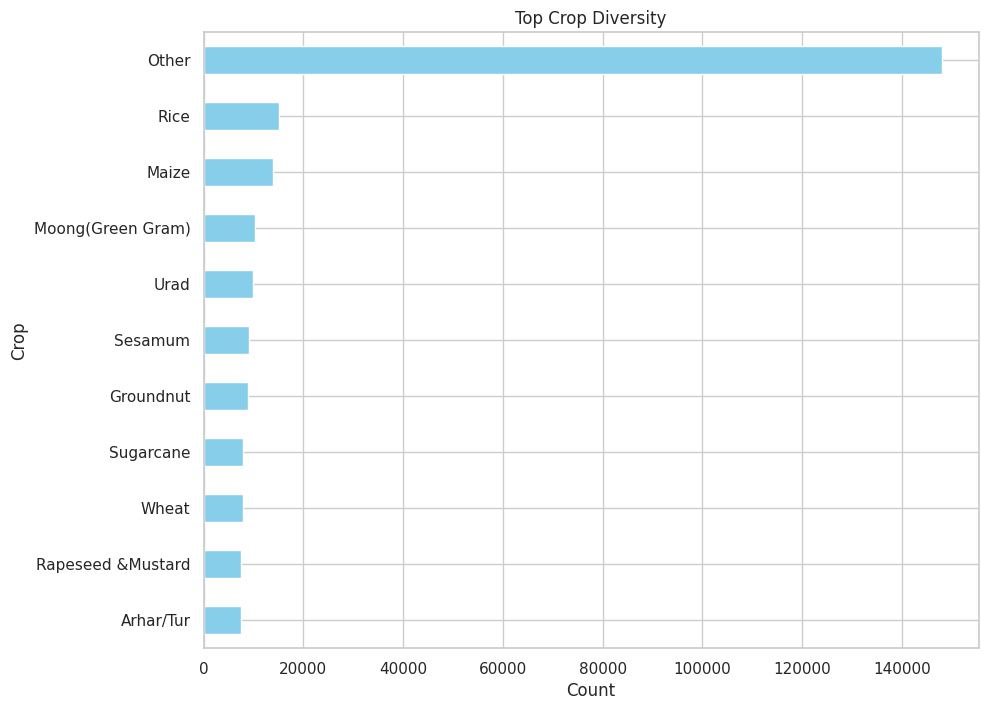

In [116]:
# Top Crop Diversity

top_n = 10

crop_counts = df['Crop'].value_counts()

top_crops = crop_counts.head(top_n)

other_count = crop_counts.iloc[top_n:].sum()

other_series = pd.Series({'Other': other_count})

final_crop_counts = pd.concat([top_crops, other_series])

plt.figure(figsize=(10, 8))
final_crop_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top Crop Diversity')
plt.xlabel('Count')
plt.ylabel('Crop')
plt.show()

### COMBINE ALL THE DUPLICATED OR DUPLICATED INTO ONE CROP AND CORRECT THE SPELLING OF ALL THE INCORRECTED ONES

In [117]:
df["Crop"] = df["Crop"].apply( lambda x : "Seasum" if x == "Sesamum" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Pomegranate" if x == "Pome Granet" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Sunhemp" if x == "Sannhamp" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Raddish" if x == "Redish" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Soybean" if x == "Soyabean" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Snake Gourd" if x == "Snak Guard" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Pumpkin" if x == "Pump Kin" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Paddy" if x == "Rice" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Blackgram" if x == "Urad" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Lentil" if x == "Masoor" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Jute & mesta" if x == "Jute" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Jute & mesta" if x == "Mesta" else x)
df["Crop"] = df["Crop"].apply( lambda x : "Cotton(lint)" if x == "Kapas" else x)

Unique_Crop = df["Crop"].unique()
print(Unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Paddy' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Blackgram' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Lentil' 'Seasum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soybean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Jute & mesta' 'Cowpea(Lobia)'
 'Lemon' 'Pomegranate' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sunhemp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Peas & beans (Pulses)' 'Pineapple' 'Barley' 'Khesari'
 'Guar seed' 'Moth' 'Other Cereals & M

In [118]:
def category_name(name):
    Cereals =['Paddy', 'Maize', 'Bajra', 'Jowar', 'Korra', 'Ragi', 'Wheat', 'Barley']
    Pulses= ['Other Kharif pulses', 'Moong(Green Gram)', 'Blackgram', 'Arhar/Tur', 'Gram', 'Lentil', 'Samai', 'Small millets', 'Other  Rabi pulses', 'Peas & beans (Pulses)', 'Pulses total', 'Other Cereals & Millets']
    Vegetables= ['Sweet potato', 'Tapioca', 'Onion', 'Potato', 'Beans & Mutter(Vegetable)', 'Bhindi', 'Brinjal', 'Cucumber', 'Other Vegetables', 'Papaya', 'Tomato', 'Cabbage', 'Peas  (vegetable)', 'Bottle Gourd', 'Turnip', 'Carrot', 'Raddish', 'Bitter Gourd', 'Drum Stick', 'Snake Gourd', 'Pumpkin', 'Cauliflower']
    Fruits= ['Banana', 'Citrus Fruit', 'Grapes', 'Mango', 'Orange', 'Other Fresh Fruits', 'Pome Fruit', 'Lemon', 'Pomegranate', 'Sapota', 'Pineapple', 'Apple', 'Peach', 'Pear', 'Plums', 'Litchi', 'Ber', 'Water Melon']
    Oilseeds = ['other oilseeds', 'Groundnut', 'Sunflower', 'Castor seed', 'Soybean', 'Seasum', 'Linseed', 'Safflower', 'Niger seed', 'Rapeseed &Mustard', 'Guar seed']
    Condiments= ['Dry ginger', 'Black pepper', 'Dry chillies', 'Turmeric', 'Coriander', 'Garlic', 'Ginger', 'Cardamom']
    Dryfruits = ['Arcanut (Processed)', 'Atcanut (Raw)', 'Cashewnut Processed', 'Cashewnut Raw']
    Plantation = ['Arecanut', 'Cashewnut', 'Coconut', 'Rubber', 'Tea', 'Coffee']
    
    if name in Cereals:
        return 'Cereal'
    elif name in Pulses:
        return 'Pulses'
    elif name in Vegetables:
        return 'Vegetable'
    elif name in Fruits:
        return 'Fruit'
    elif name in Oilseeds:
        return 'Oilseed'
    elif name in Condiments:
        return 'Condiment'
    elif name in Dryfruits:
        return 'Dryfruit'
    elif name in Plantation:
        return 'Plantation'
    else:
        return 'None'
    
df["Category"] = df["Crop"].apply(category_name)
print(df["Category"].unique())

['Plantation' 'Pulses' 'Cereal' 'Fruit' 'Condiment' 'None' 'Vegetable'
 'Oilseed' 'Dryfruit']


In [119]:
# Calculate category counts
category_counts = df['Category'].value_counts()

# Create a DataFrame for plotting
category_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# Plot pie chart
fig = px.pie(category_df, values='Count', names='Category', title='Category Distribution of Crops')
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.1]*len(category_counts))
fig.show()

### CATEGORIZE INDIAN STATES INTO THEIR RESPECTIVE REGIONS

In [120]:
def category(name):
    east_india = ["West Bengal", "Odisha", "Assam", "Sikkim", "Tripura", "Manipur", "Mizoram", "Nagaland", "Arunachal Pradesh", "Meghalaya"]
    west_india = ["Maharashtra", "Gujarat", "Rajasthan", "Goa", "Dadra and Nagar Haveli"]
    north_india = ["Uttar Pradesh", "Chandigarh", "Bihar","Jammu and Kashmir ", "Uttarakhand","Jharkhand", "Haryana", "Punjab", "Himachal Pradesh", "Delhi", "Chhattisgarh", "Madhya Pradesh"]
    south_india = ["Tamil Nadu", "Telangana ", "Kerala", "Karnataka", "Andhra Pradesh", "Andaman and Nicobar Islands", "Puducherry"]
    
    if name in east_india:
        return 'East India'
    elif name in west_india:
        return 'West India'
    elif name in north_india:
        return 'North India'
    elif name in south_india:
        return 'South India'
    else:
        return 'None'
    
df["Region"] = df["State_Name"].apply(category)
print(df["Region"].unique())
    
    

['South India' 'East India' 'North India' 'West India']


In [121]:
ny_def = df.loc[df['Region'] == 'None']
ny_def["State_Name"].unique()

array([], dtype=object)

In [122]:
df.columns = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region' ]

In [123]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region'],
      dtype='object')

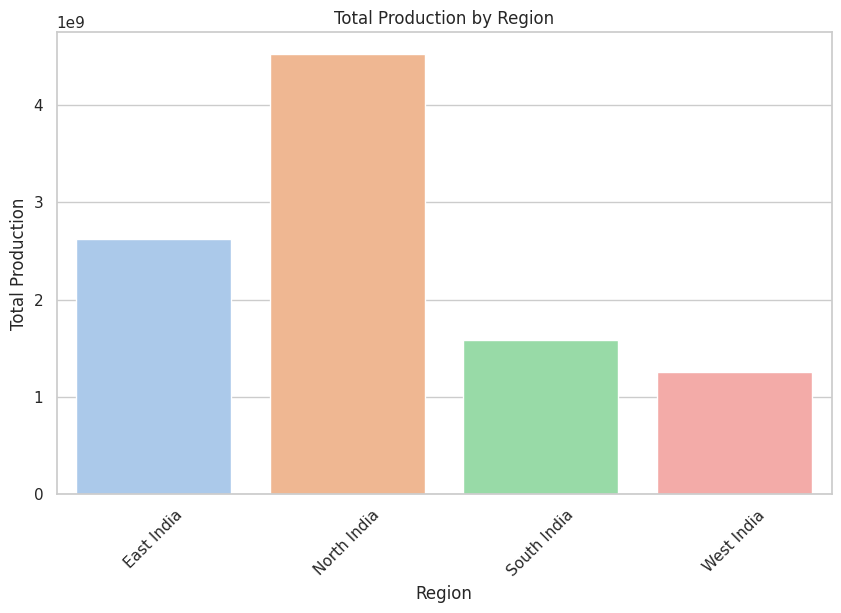

In [143]:
# Define colors for the bar plot
colors = sns.color_palette('pastel')

# Plot regional comparison with different colors for each region
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_comparison, x='Region', y='Total Production', palette=colors)
plt.title('Total Production by Region')
plt.xlabel('Region')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()


### PRODUCTIVITY AND TOTAL PRODUCTION

In [124]:
df["Productivity"] = df["Production(tonnes)"]/df["Area(hectare)"]
df["Total Production"] = df["Production(tonnes)"]*df["Area(hectare)"]

In [125]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

In [126]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(hectare),Production(tonnes),Date,Category,Region,Productivity,Total Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01,Plantation,South India,1.594896,2508000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01,Pulses,South India,0.500000,2.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Paddy,102.0,321.0,2000-01-01,Cereal,South India,3.147059,32742.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01,Fruit,South India,3.642045,112816.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Plantation,South India,0.229167,118800.0


### DROP ALL THE NULL VALUES

In [127]:
df = df.dropna(axis=0)

### DROP ROWS WITH AREA IS 1, 2, 3, 4, 5, 6, 7, and 10

In [128]:
df = df.drop(df[df['Area(hectare)']==1].index)
df = df.drop(df[df['Area(hectare)']==2].index)
df = df.drop(df[df['Area(hectare)']==3].index)
df = df.drop(df[df['Area(hectare)']==4].index)
df = df.drop(df[df['Area(hectare)']==5].index)
df = df.drop(df[df['Area(hectare)']==6].index)
df = df.drop(df[df['Area(hectare)']==7].index)
df = df.drop(df[df['Area(hectare)']==10].index)

### DROP ROWS WHEN PRODUCTION IS 0, 1, 2, 3, 4, 5, 6, and 10

In [129]:
df = df.drop(df[df['Production(tonnes)']==0].index)
df = df.drop(df[df['Production(tonnes)']==1].index)
df = df.drop(df[df['Production(tonnes)']==2].index)
df = df.drop(df[df['Production(tonnes)']==3].index)
df = df.drop(df[df['Production(tonnes)']==4].index)
df = df.drop(df[df['Production(tonnes)']==5].index)
df = df.drop(df[df['Production(tonnes)']==6].index)
df = df.drop(df[df['Production(tonnes)']==10].index)

In [130]:
df.to_csv("Cleaned.csv", index = False)

In [131]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

### REMOVE THE OUTLIERS

In [132]:
q1 = df["Total Production"].quantile(0.40)
q3 = df["Total Production"].quantile(0.60)
IQR = q3 - q1

df = df[(df["Total Production"] >= q1 - 1.5*IQR) & (df["Total Production"] <= q3 + 1.5*IQR)]

In [133]:
q1 = df["Productivity"].quantile(0.40)
q3 = df["Productivity"].quantile(0.60)
IQR = q3 - q1

df = df[(df["Productivity"] >= q1 - 1.5*IQR) & (df["Productivity"] <= q3 + 1.5*IQR)]

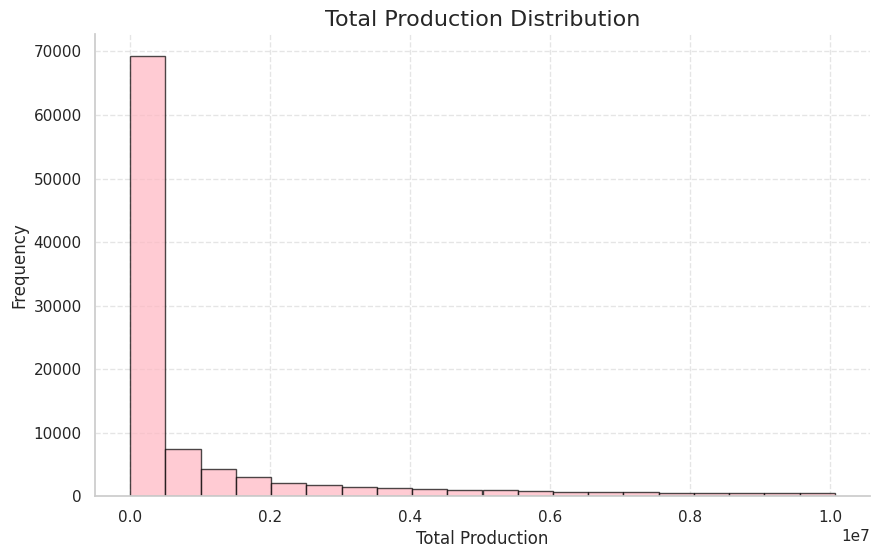

In [134]:
plt.figure(figsize=(10, 6))

plt.hist(df["Total Production"], bins=20, color='lightpink', edgecolor='black', alpha=0.7)

plt.title('Total Production Distribution', fontsize=16)
plt.xlabel('Total Production', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

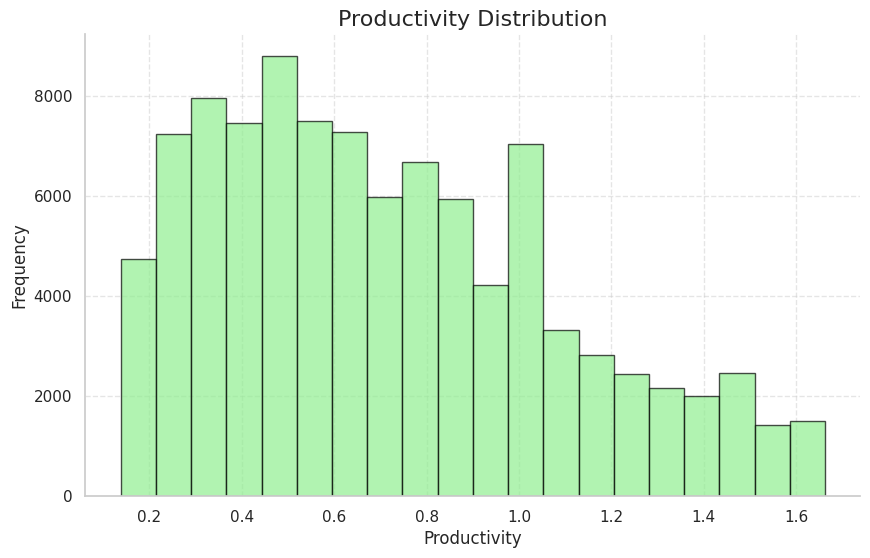

In [135]:
plt.figure(figsize=(10, 6))

plt.hist(df["Productivity"], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)

plt.title('Productivity Distribution', fontsize=16)
plt.xlabel('Productivity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [136]:
df.to_csv("CleanedIQR.csv", index = False)

In [137]:
q1 = df["Area(hectare)"].quantile(0.40)
q3 = df["Area(hectare)"].quantile(0.60)
IQR = q3 - q1

df = df[(df["Area(hectare)"] >= q1 - 1.5*IQR) & (df["Area(hectare)"] <= q3 + 1.5*IQR)]

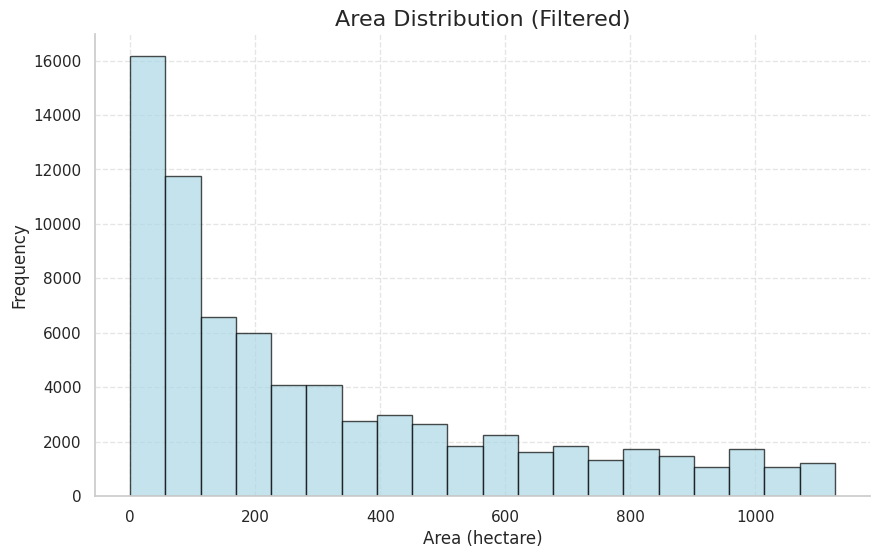

In [138]:
plt.figure(figsize=(10, 6))
plt.hist(df["Area(hectare)"], bins=20, color='lightblue', edgecolor='black', alpha=0.7)

plt.title('Area Distribution (Filtered)', fontsize=16)
plt.xlabel('Area (hectare)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [139]:
df.to_csv("CleanedIQR.csv", index = False)

In [140]:
# Calculate additional statistical measures
mean_area = df["Area(hectare)"].mean()
median_area = df["Area(hectare)"].median()
std_dev_area = df["Area(hectare)"].std()
min_area = df["Area(hectare)"].min()
max_area = df["Area(hectare)"].max()

# Print the statistical measures
print("Additional Statistical Measures:")
print(f"Mean Area: {mean_area:.2f} hectares")
print(f"Median Area: {median_area:.2f} hectares")
print(f"Standard Deviation of Area: {std_dev_area:.2f} hectares")
print(f"Minimum Area: {min_area:.2f} hectares")
print(f"Maximum Area: {max_area:.2f} hectares")

Additional Statistical Measures:
Mean Area: 309.40 hectares
Median Area: 199.00 hectares
Standard Deviation of Area: 301.69 hectares
Minimum Area: 0.10 hectares
Maximum Area: 1127.00 hectares
